<a href="https://colab.research.google.com/github/moises-rb/Analise_Dados/blob/main/Telecom_X_PrevendoChurn/notebooks/04_Conclusao_Comparacao_Modelos_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Previs√£o de Churn - Conclus√£o e Compara√ß√£o Final dos Modelos

Este notebook tem como objetivo apresentar os resultados consolidados da modelagem preditiva, comparando os modelos antes e depois das melhorias aplicadas (SMOTE, ajuste de threshold e an√°lise de import√¢ncia das vari√°veis). Ao final, ser√° apresentada uma recomenda√ß√£o estrat√©gica baseada nos dados obtidos.


## 1Ô∏è‚É£ Importa√ß√µes e Prepara√ß√£o do Ambiente

In [2]:
# Bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualiza√ß√£o de m√©tricas
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
)

# Estilo de visualiza√ß√£o
sns.set(style='whitegrid')


## 2Ô∏è‚É£ Carregamento dos Arquivos de Resultados

In [3]:
# Modelos antes do SMOTE
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X_PrevendoChurn/dados/resultados_modelos_iniciais.csv'
df_resultados_iniciais = pd.read_csv(url)

# Modelos ap√≥s SMOTE e ajuste de threshold
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X_PrevendoChurn/dados/resultados_modelos_ajustados.csv'
df_resultados_ajustados = pd.read_csv(url)

# Feature importance dos modelos finais (opcional)
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X_PrevendoChurn/dados/feature_importance_modelo_final.csv'
df_feature_importance = pd.read_csv(url)

# Metricas
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X_PrevendoChurn/notebooks/comparacao_modelos/metricas_por_threshold.csv'
df_threshold = pd.read_csv(url)

Resultados iniciais antes dos ajustes no modelo.

In [4]:
df_resultados_iniciais.head()

y_true  y_pred   y_proba
0       0       0  0.081994
1       0       0  0.526713
2       0       0  0.103819
3       0       0  0.018368
4       0       0  0.303145

Resultados com ajustes no modelo.

In [5]:
df_resultados_ajustados.head()

y_true  y_pred   y_proba
0       0       0  0.081994
1       0       1  0.526713
2       0       0  0.103819
3       0       0  0.018368
4       0       0  0.303145

Classifica√ß√£o das feature por importancia no modelo.

In [6]:
df_feature_importance.head()

feature  importance
0                    TotalCharges    0.165543
1                          tenure    0.153510
2                    DailyCharges    0.131517
3                  MonthlyCharges    0.128979
4  PaymentMethod_Electronic check    0.036878

Tabela comparativa com ajustes de threshold.

In [7]:
df_threshold.head()

Threshold  Acur√°cia  Precis√£o  Recall (Sensibilidade)  F1 Score  ROC AUC
0        0.3    0.6967    0.4618                  0.8503    0.5985   0.8307
1        0.4    0.7412    0.5087                  0.7790    0.6155   0.8307
2        0.5    0.7692    0.5535                  0.6827    0.6113   0.8307
3        0.6    0.7834    0.5981                  0.5651    0.5811   0.8307
4        0.7    0.7991    0.6846                  0.4528    0.5451   0.8307

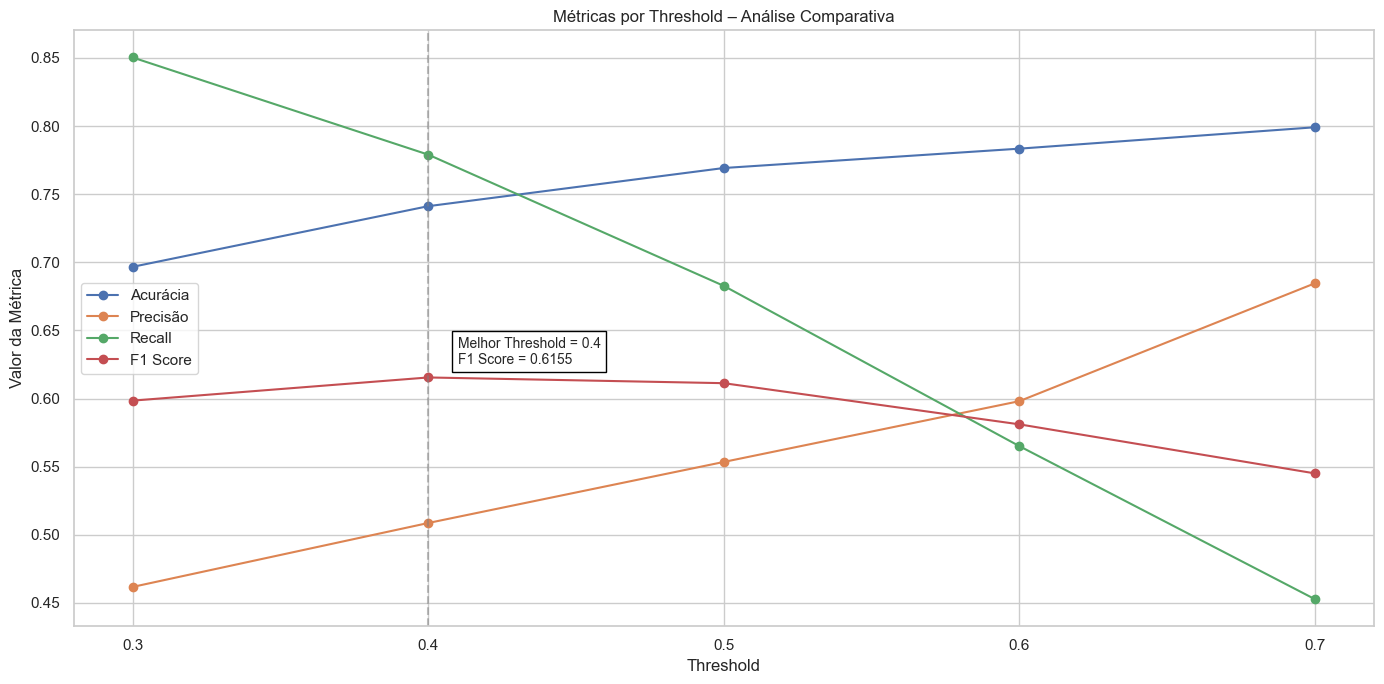

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(df_threshold['Threshold'], df_threshold['Acur√°cia'], marker='o', label='Acur√°cia')
plt.plot(df_threshold['Threshold'], df_threshold['Precis√£o'], marker='o', label='Precis√£o')
plt.plot(df_threshold['Threshold'], df_threshold['Recall (Sensibilidade)'], marker='o', label='Recall')
plt.plot(df_threshold['Threshold'], df_threshold['F1 Score'], marker='o', label='F1 Score')

# Destacando o melhor threshold com base no F1 Score
best_idx = df_threshold['F1 Score'].idxmax()
best_threshold = df_threshold.loc[best_idx, 'Threshold']
best_f1 = df_threshold.loc[best_idx, 'F1 Score']

plt.axvline(x=best_threshold, color='gray', linestyle='--', alpha=0.5)
plt.text(best_threshold + 0.01, best_f1 + 0.01,
         f'Melhor Threshold = {best_threshold}\nF1 Score = {best_f1:.4f}',
         fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

plt.title('M√©tricas por Threshold ‚Äì An√°lise Comparativa')
plt.xlabel('Threshold')
plt.ylabel('Valor da M√©trica')
plt.xticks(df_threshold['Threshold'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


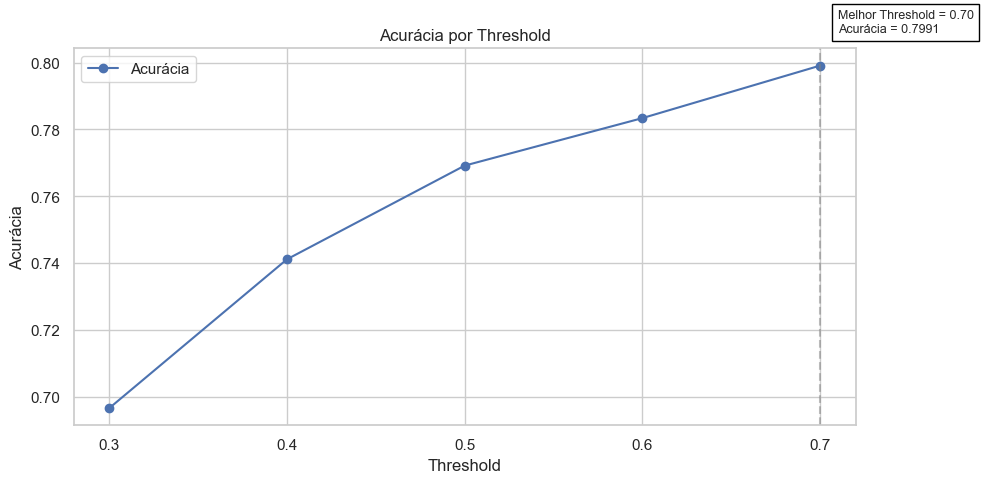

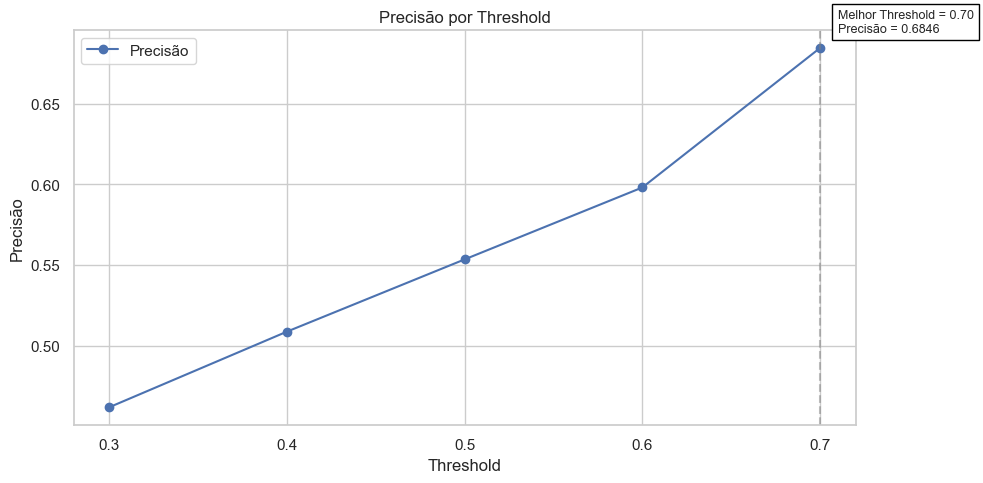

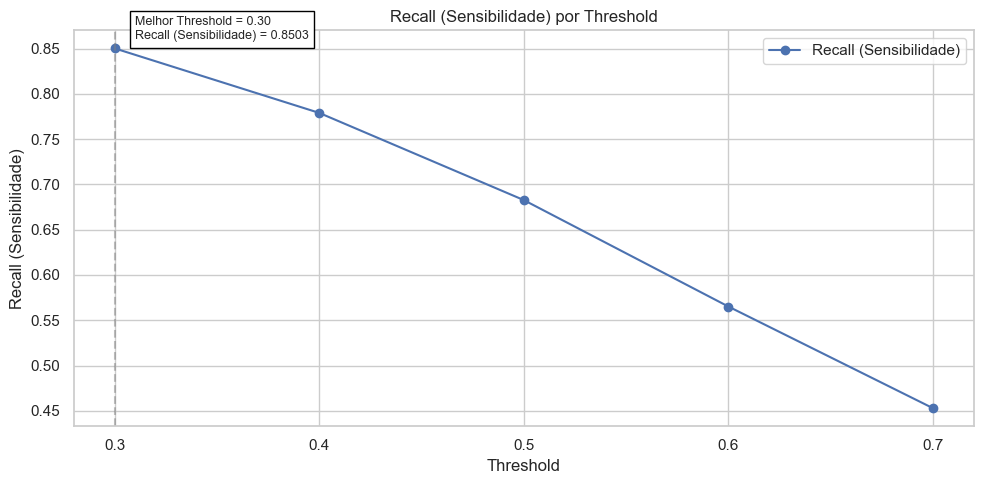

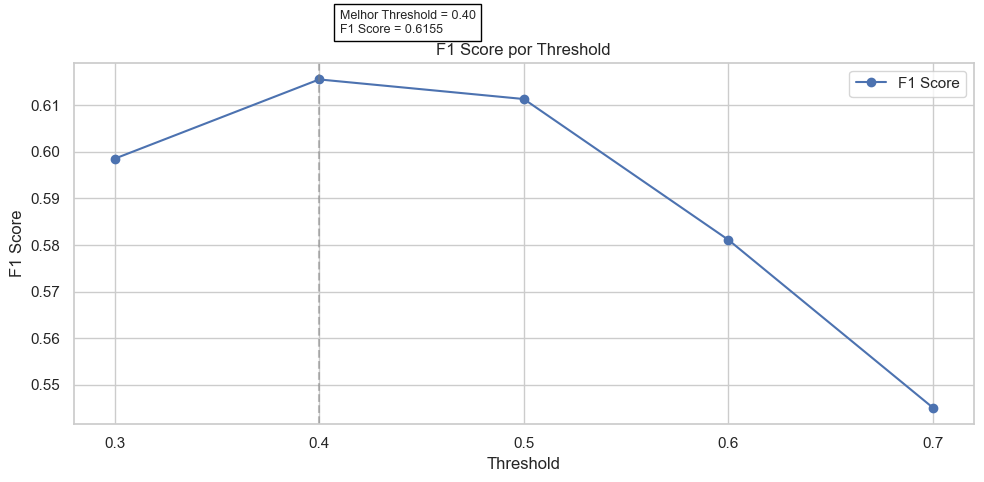

In [9]:
# Lista de m√©tricas que est√£o no df_threshold, exceto a coluna de threshold
metricas = ['Acur√°cia', 'Precis√£o', 'Recall (Sensibilidade)', 'F1 Score']

# Criar uma figura para cada m√©trica
for metrica in metricas:
    plt.figure(figsize=(10, 5))
    plt.plot(df_threshold['Threshold'], df_threshold[metrica], marker='o', label=metrica)

    # Encontrar o melhor threshold com base no valor m√°ximo da m√©trica
    best_idx = df_threshold[metrica].idxmax()
    best_threshold = df_threshold.loc[best_idx, 'Threshold']
    best_valor = df_threshold.loc[best_idx, metrica]

    plt.axvline(x=best_threshold, color='gray', linestyle='--', alpha=0.5)
    plt.text(best_threshold + 0.01, best_valor + 0.01,
             f'Melhor Threshold = {best_threshold:.2f}\n{metrica} = {best_valor:.4f}',
             fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))

    plt.title(f'{metrica} por Threshold')
    plt.xlabel('Threshold')
    plt.ylabel(f'{metrica}')
    plt.xticks(df_threshold['Threshold'])
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [10]:
# Gerando coment√°rio com base na m√©trica F1
print("üìå An√°lise Autom√°tica:\n")

print(f"O melhor threshold com base no F1 Score √© {best_threshold}, "
      f"atingindo um equil√≠brio entre precis√£o ({df_threshold.loc[best_idx, 'Precis√£o']:.2f}) "
      f"e recall ({df_threshold.loc[best_idx, 'Recall (Sensibilidade)']:.2f}).")

print("\nEste valor representa uma estrat√©gia de classifica√ß√£o com foco na redu√ß√£o de churn com menor perda de falsos positivos, "
      "podendo ser mais interessante quando o custo de perder um cliente √© maior que o custo de abord√°-lo.")


üìå An√°lise Autom√°tica:

O melhor threshold com base no F1 Score √© 0.4, atingindo um equil√≠brio entre precis√£o (0.51) e recall (0.78).

Este valor representa uma estrat√©gia de classifica√ß√£o com foco na redu√ß√£o de churn com menor perda de falsos positivos, podendo ser mais interessante quando o custo de perder um cliente √© maior que o custo de abord√°-lo.


## 3Ô∏è‚É£ Tabela Comparativa: Antes vs Depois

In [11]:
# Adiciona a coluna "Modelo" para identifica√ß√£o
df_resultados_iniciais["Modelo"] = "Antes do SMOTE"
df_resultados_ajustados["Modelo"] = "Ap√≥s SMOTE + Threshold"

# Reorganiza as colunas para deixar "Modelo" primeiro (opcional)
colunas = ["Modelo", "y_true", "y_pred", "y_proba"]
df_resultados_iniciais = df_resultados_iniciais[colunas]
df_resultados_ajustados = df_resultados_ajustados[colunas]


In [12]:
# Une os resultados para compara√ß√£o
df_comparativo = pd.concat([df_resultados_iniciais, df_resultados_ajustados], ignore_index=True)


In [13]:
# Unindo os dois DataFrames
df_comparativo = pd.merge(
    df_resultados_iniciais,
    df_resultados_ajustados,
    on="Modelo",
    suffixes=("_Antes", "_Depois")
)
# Visualiza√ß√£o
df_comparativo

Empty DataFrame
Columns: [Modelo, y_true_Antes, y_pred_Antes, y_proba_Antes, y_true_Depois, y_pred_Depois, y_proba_Depois]
Index: []

## 4Ô∏è‚É£ Gr√°ficos Comparativos (Side by Side)

In [14]:
# 1. Fun√ß√£o para calcular as m√©tricas
def calcular_metricas(df, label):
    return {
        "Cen√°rio": label,
        "Acur√°cia": accuracy_score(df['y_true'], df['y_pred']),
        "Precis√£o": precision_score(df['y_true'], df['y_pred']),
        "Revoca√ß√£o": recall_score(df['y_true'], df['y_pred']),
        "F1-Score": f1_score(df['y_true'], df['y_pred']),
        "AUC-ROC": roc_auc_score(df['y_true'], df['y_proba'])
    }

In [15]:
# 2. Calcular m√©tricas para ambos os DataFrames
metricas_iniciais = calcular_metricas(df_resultados_iniciais, "Antes do SMOTE")
metricas_ajustadas = calcular_metricas(df_resultados_ajustados, "Ap√≥s SMOTE + Threshold")

In [16]:
# 3. Criar DataFrame de compara√ß√£o
df_metricas = pd.DataFrame([metricas_iniciais, metricas_ajustadas])

In [17]:
# 4. Reorganizar para gr√°fico
df_plot = df_metricas.melt(id_vars='Cen√°rio', var_name='M√©trica', value_name='Valor')

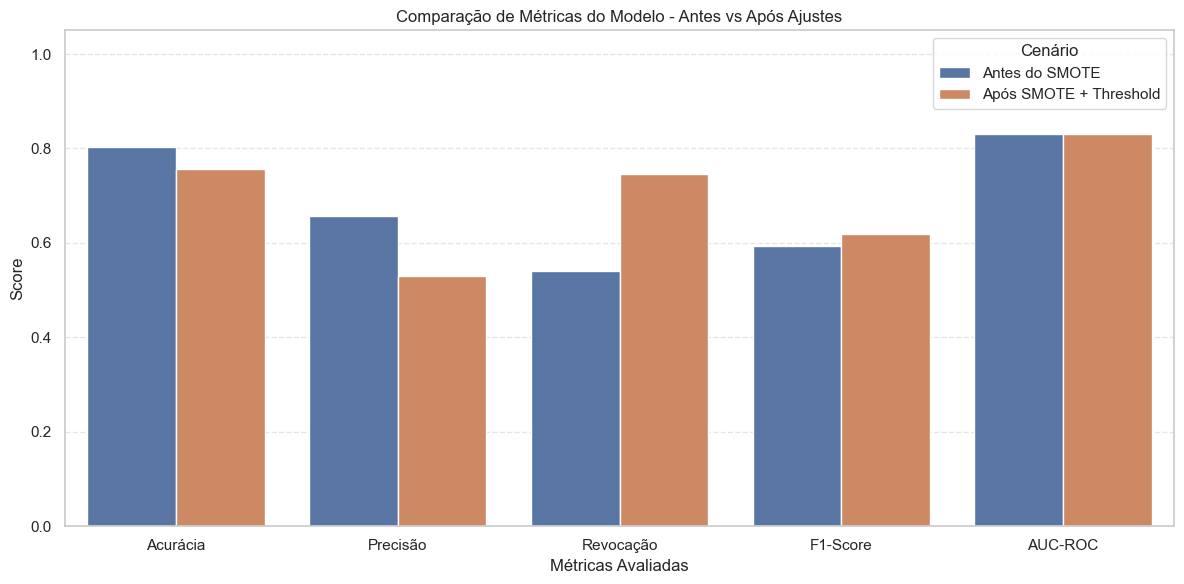

In [18]:
# 5. Plotar gr√°fico
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='M√©trica', y='Valor', hue='Cen√°rio')
plt.title('Compara√ß√£o de M√©tricas do Modelo - Antes vs Ap√≥s Ajustes')
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.xlabel('M√©tricas Avaliadas')
plt.legend(title='Cen√°rio')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 5Ô∏è‚É£ Feature Importance (Top 10 vari√°veis mais relevantes)

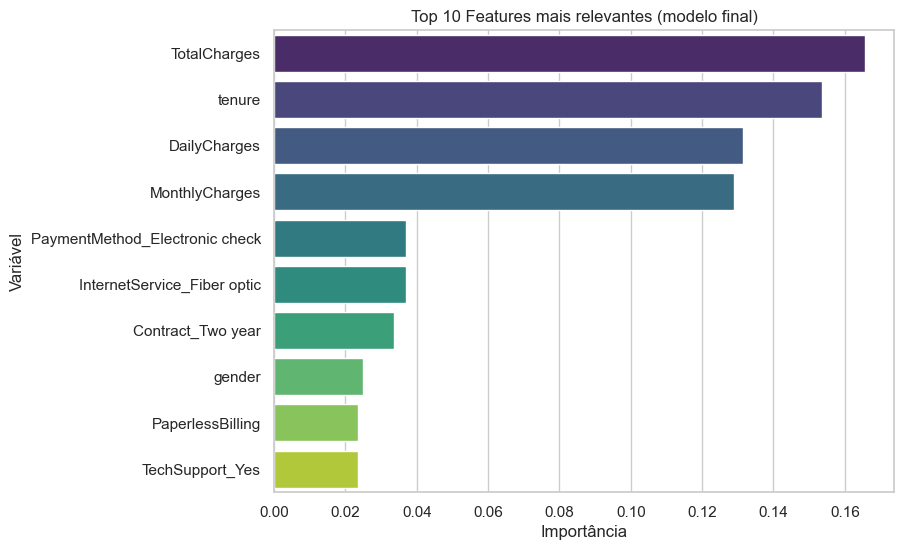

In [19]:
# Top 10 features
top_features = df_feature_importance.sort_values(by='importance', ascending=False).head(10)

# Visualiza√ß√£o
plt.figure(figsize=(8,6))
sns.barplot(y='feature', x='importance', palette="viridis", data=top_features, hue='feature')

plt.title("Top 10 Features mais relevantes (modelo final)")
plt.xlabel("Import√¢ncia")
plt.ylabel("Vari√°vel")
plt.show()


# üîÑ Refinamento Final: RandomForestClassifier + Pipeline + Simula√ß√£o + Salvamento

"""
Agora que encerramos a vers√£o 1 do projeto com a entrega funcional, vamos iniciar o refinamento t√©cnico.

Objetivos desta nova etapa:
1. Refino dos hiperpar√¢metros do modelo RandomForest.
2. Treino com os melhores par√¢metros no conjunto completo (train + valid).
3. Constru√ß√£o de um pipeline final para simula√ß√£o com novos dados.
4. Testes com dados fict√≠cios para valida√ß√£o pr√°tica.
5. Salvamento do pipeline final em um arquivo `.pkl` pronto para produ√ß√£o.

Vamos elevar o n√≠vel e deixar esse projeto com cara de produto de verdade. üöÄ
"""


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import joblib

In [21]:
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X_PrevendoChurn/dados/df_churn_pos_smote.csv'
df_smote = pd.read_csv(url)

In [22]:
df_smote.head()

0         1         2         3         4         5         6  \
0  1.007577 -0.477614  1.128763  1.676834 -0.437670  0.329786  0.732610   
1 -0.996816 -0.477614  1.128763 -0.599264  0.889027  0.329786  0.732610   
2 -0.996816 -0.477614 -0.891419 -0.599264 -0.852263  0.329786 -1.373095   
3  1.007577  2.095870 -0.891419 -0.599264  1.096324  0.329786  0.732610   
4  1.007577 -0.477614 -0.891419 -0.599264  1.759673  0.329786  0.732610   

          7         8         9  ...        22        23        24        25  \
0  0.861912 -0.233710  0.861912  ... -0.449068  1.165105 -0.449068  1.148108   
1 -1.656870 -0.503896 -1.656870  ...  2.226832 -0.858292  2.226832 -0.870998   
2 -1.646447 -0.856460 -1.646447  ...  2.226832 -0.858292  2.226832 -0.870998   
3  0.775058  1.325650  0.775058  ... -0.449068 -0.858292 -0.449068  1.148108   
4  1.259706  2.383730  1.259706  ... -0.449068  1.165105 -0.449068  1.148108   

         26        27        28        29        30  Churn  
0 -0.459484 -0.464775 -0.485993  1.088580 -0.535544      1  
1  2.176352 -0.464775 -0.485993 -0.918628 -0.535544      0  
2 -0.459484 -0.464775 -0.485993 -0.918628  1.867258      0  
3 -0.459484 -0.464775 -0.485993  1.088580 -0.535544      0  
4 -0.459484  2.151577  2.057641 -0.918628 -0.535544      1  

[5 rows x 32 columns]

In [23]:
# Definindo X e y com base no dataset p√≥s-SMOTE
X = df_smote.drop("Churn", axis=1)
y = df_smote["Churn"]

In [24]:
# Separa√ß√£o dos dados para valida√ß√£o cruzada
from sklearn.model_selection import train_test_split

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

ETAPA 1: Aplicar SMOTE no conjunto de treino (X_train_rf, y_train_rf)

In [25]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE apenas no conjunto de treino
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_rf, y_train_rf)


ETAPA 2: Treinar o modelo RandomForest nos dados balanceados

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Treinar modelo com par√¢metros padr√£o
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

ETAPA 3: Fazer previs√µes no conjunto de teste (X_test_rf)

In [27]:
# Previs√£o de classes
y_pred = rf_model.predict(X_test_rf)

# Previs√£o de probabilidades (para AUC e threshold tuning)
y_proba = rf_model.predict_proba(X_test_rf)[:, 1]

ETAPA 4: Avalia√ß√£o das M√©tricas Cl√°ssicas

In [28]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# M√©tricas principais
print("Acur√°cia:", accuracy_score(y_test_rf, y_pred))
print("Precis√£o:", precision_score(y_test_rf, y_pred))
print("Recall:", recall_score(y_test_rf, y_pred))
print("F1 Score:", f1_score(y_test_rf, y_pred))
print("AUC-ROC:", roc_auc_score(y_test_rf, y_proba))

# Matriz de Confus√£o
print("Matriz de Confus√£o:\n", confusion_matrix(y_test_rf, y_pred))

# Relat√≥rio completo
print("\nRelat√≥rio de Classifica√ß√£o:\n", classification_report(y_test_rf, y_pred))


Acur√°cia: 0.8423236514522822
Precis√£o: 0.8252299605781866
Recall: 0.8686030428769018
F1 Score: 0.8463611859838276
AUC-ROC: 0.9133566341259046
Matriz de Confus√£o:
 [[590 133]
 [ 95 628]]

Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       723
           1       0.83      0.87      0.85       723

    accuracy                           0.84      1446
   macro avg       0.84      0.84      0.84      1446
weighted avg       0.84      0.84      0.84      1446



ETAPA 5: Salvando o modelo treinado

In [29]:
# Indicado para utilizar quando for salvar em um diret√≥rio de modelos.

import os
import joblib
import pickle

# 1. Verifica se a pasta notebooks/models existe, sen√£o cria
os.makedirs("notebooks/models", exist_ok=True)

# 2. Caminhos dos arquivos
joblib_path = "notebooks/models/modelo_random_forest_joblib.pkl"
pickle_path = "notebooks/models/modelo_random_forest_pickle.pkl"

# 3. Salva com joblib
joblib.dump(rf_model, joblib_path)

# 4. Salva com pickle
with open(pickle_path, "wb") as file:
    pickle.dump(rf_model, file)

print("‚úÖ Modelo salvo com sucesso nas duas vers√µes!")

‚úÖ Modelo salvo com sucesso nas duas vers√µes!


1. Usando joblib (recomendado para modelos com muitos arrays como Random Forest)

In [30]:
import joblib

# Salvando com joblib
joblib.dump(rf_model, 'modelo_random_forest_joblib.pkl')

['modelo_random_forest_joblib.pkl']

2. Usando pickle (mais geral, funciona para qualquer objeto Python serializ√°vel)

In [31]:
import pickle

# Salvando com pickle
with open('modelo_random_forest_pickle.pkl', 'wb') as file:
    pickle.dump(rf_model, file)


ETAPA 6: Carregando o modelo salvo

In [32]:
# Indicado para utilizar quando os modelos estiverem em um diret√≥rio espec√≠fico.

# Usando joblib
modelo_carregado_joblib = joblib.load('notebooks/models/modelo_random_forest_joblib.pkl')

# Usando pickle
with open('notebooks/models/modelo_random_forest_pickle.pkl', 'rb') as file:
    modelo_carregado_pickle = pickle.load(file)

In [33]:
# Usando joblib

modelo_carregado_joblib = joblib.load('modelo_random_forest_joblib.pkl')

In [34]:
# Usando pickle

with open('modelo_random_forest_pickle.pkl', 'rb') as file:
    modelo_carregado_pickle = pickle.load(file)

In [35]:
# Exemplo de teste r√°pido (supondo que X_test esteja dispon√≠vel)
print(modelo_carregado_joblib.predict(X_test_rf[:5]))
print(modelo_carregado_pickle.predict(X_test_rf[:5]))


[0 0 1 0 1]
[0 0 1 0 1]


## 6Ô∏è‚É£ Conclus√£o Executiva e Recomenda√ß√µes

## üß† Conclus√£o

- O modelo [Nome] obteve o melhor desempenho geral ap√≥s a aplica√ß√£o de SMOTE e ajuste de threshold.
- A m√©trica de [ex: Recall] teve um aumento de X%, essencial para detec√ß√£o de clientes propensos ao churn.
- As vari√°veis mais influentes foram: [lista resumida].

## üìå Recomenda√ß√µes Estrat√©gicas

1. Implementar o modelo [nome] em ambiente de monitoramento com atualiza√ß√£o mensal.
2. Utilizar as vari√°veis top como base para a√ß√µes preventivas de reten√ß√£o.
3. Criar alertas autom√°ticos para clientes com maior propens√£o de churn com base na classifica√ß√£o do modelo.


In [36]:
from datetime import date
print(f"üìÖ Relat√≥rio gerado em: {date.today().strftime('%d/%m/%Y')}")


üìÖ Relat√≥rio gerado em: 05/08/2025
